# SUPPORT VECTOR MACHINES

In [1]:
#SVM is a method of classification of classes based on a 
#hyperplane that seperates the support vectors(points in n-dim plane divided 
#by n-1 dim hyperplane) based on their distance form the hyperplane..the 
#objective is to maximize the minimum distance from the hyperplane

In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [3]:
X_data, y_data = make_classification(n_classes=2, n_samples=400, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=3)

In [4]:
# We need top convert y to [-1,1], not [0,1] as we are gonna multiply y[ix] in the loss formula 
# if we use 0 we r gonna loose data

y_data[y_data==0] = -1   ## use of broadcasting in python
print(y_data)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

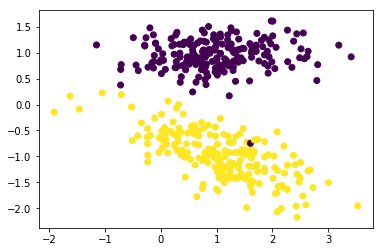

In [5]:
plt.scatter(X_data[:,0], X_data[:,1], c=y_data)

In [6]:
class SVM:
    
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hinge_loss(self,W,b,X_data,y_data):
        
        loss = 0
        loss += 0.5*np.dot(W,W.T)
        
        for ix in range(X_data.shape[0]):
            ti = y_data[ix]*(np.dot(W,X_data[ix].T)+b)
            loss += self.C*max(0,(1-ti))
        
        return loss[0][0]
    
    def fit(self,X_data,y_data,batch_size=100,learning_rate=0.001,maxItr=130):
        
        no_of_features = X_data.shape[1]
        no_of_samples = X_data.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Initialize the model parameters
        
        W = np.zeros((1,no_of_features))
        bias = 0
        
        print(self.hinge_loss(W,bias,X_data,y_data))
        
        #Training of the data
        #weight and bias update rule
        
        losses = []
        
        for ix in range(maxItr):     ## Training loop
            
            l = self.hinge_loss(W,bias,X_data,y_data)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            # Batch gradient descent with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                
                gradw = 0       ## assume zero grad for the batch
                gradb = 0
                
                for jx in range(batch_start,batch_start+batch_size):
                    
                    if jx<no_of_samples:                          ## so the no of batch not exceeeds sample no.
                        idx = ids[jx]
                        ti = y_data[ix]*(np.dot(W,X_data[ix].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                            
                        else:
                            gradw += c*y_data[idx]*X_data[idx]
                            gradb += c*y_data[idx]
                
                ##updation
                
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
            
        self.W = W
        self.b = bias
            
        return W,bias,losses

In [7]:
mySVM = SVM(C = 100)
W,b,losses = mySVM.fit(X_data,y_data)
print(losses)

40000.0
[40000.0, 3592.28358543218, 3585.412595728358, 3578.570578481924, 3571.757405781938, 3564.972950325554, 3558.2170854148153, 3551.489684953473, 3544.790623443819, 3538.119775983537, 3531.477018262574, 3524.862226560035, 3518.2752777410824, 3511.7160492538724, 5189.553062765733, 5169.522406306712, 5149.5776628696, 5129.718442198607, 5109.944355972261, 5090.25501779269, 5070.650043174958, 5051.129049536493, 5031.691656186554, 5012.337484315776, 4993.066156985786, 4973.877299118867, 4954.7705374877005, 4936.104041302304, 4918.2772489184845, 4900.526983229609, 4882.852896125272, 4865.25464122394, 4847.73187386334, 4830.284251090922, 4812.91143165437, 4795.613075992176, 4778.470848844286, 4761.6396015638875, 4744.880534567491, 4728.193320055531, 4711.577631852658, 4695.033145398746, 4678.559537739943, 4662.156487519793, 4645.823674970395, 4629.560781903634, 4613.367491702456, 4597.243489312198, 4581.188461231975, 4565.202095506123, 4549.284081715683, 4533.434110969952, 4517.651875898

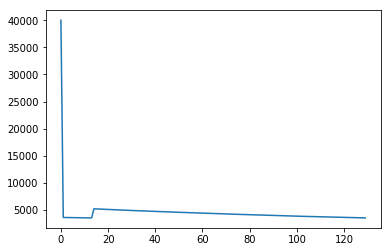

In [8]:
plt.plot(losses)
plt.show()

In [9]:
ids = np.arange(100)
np.random.shuffle(ids)
print(ids)

[71  8 47 90 17  9 48 88 21 87 22 40 28  6 44 94 84 26 96 82 10 81 20 69
 46 65 63 83 85 39 67 60 66 38  7 19 64 15 42 92 35 51 75 95 77 13 32  2
 33 23 50 57  1 53 25 72 18 11 74 16 93  4 99 79 98 30 45 56 55 86 36 41
  5 14 31 58 68  0 89 12 73 34 78 80 27 43 29 52 91 62  3 49 61 97 24 54
 76 59 37 70]


In [10]:
W,b = mySVM.W,mySVM.b
print(W, b)

[[  1.86600408 -11.99218571]] 1.8000000000000003


In [11]:
def plot_hyperplane(w1,w2,b):
    
    plt.figure(figsize=(12,12))
    x1 = np.linspace(-2,4,10)
    x2 = -(w1*x1+b)/w2     ## WT + B = 0
    
    plt.plot(x1,x2)
    
    plt.scatter(X_data[:,0], X_data[:,1], c=y_data)
    plt.show()
    

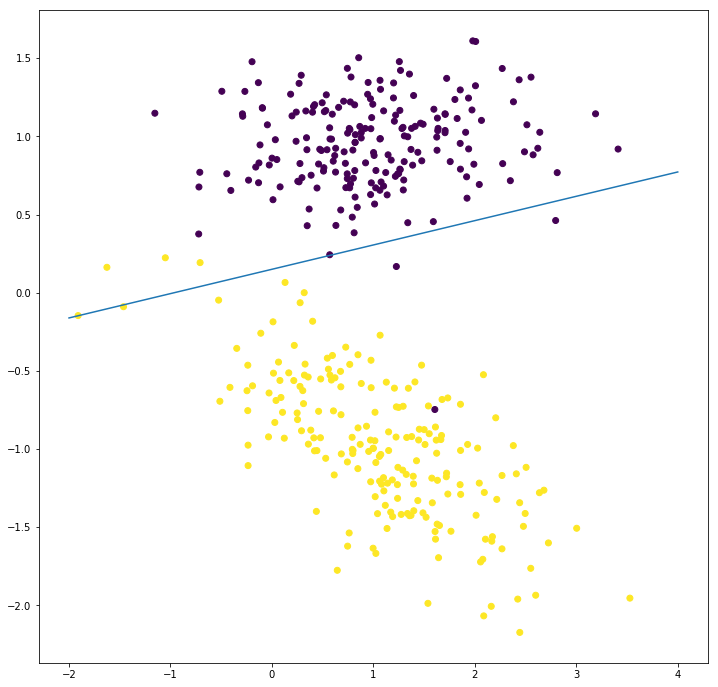

In [12]:
plot_hyperplane(W[0][0],W[0][1],b)

# Visualizing SVM and -ve, +ve Hyperplanes

In [13]:
def plot_hyperplane(w1,w2,b):
    
    plt.figure(figsize=(12,12))
    x1 = np.linspace(-2,4,10)
    x2 = -(w1*x1+b)/w2     ## WT + B = 0
    
    xp = -(w1*x1+b+1)/w2     ## WT + B = -1
    xn = -(w1*x1+b-1)/w2     ## WT + B = +1
    
    plt.plot(x1,x2,label="Hyperplane : WT + B = 0")
    plt.plot(x1,xp,label="+ve Hyperplane : WT + B = -1")
    plt.plot(x1,xn,label="-ve Hyperplane : WT + B = +1")
    plt.legend()
    plt.scatter(X_data[:,0], X_data[:,1], c=y_data)
    plt.show()

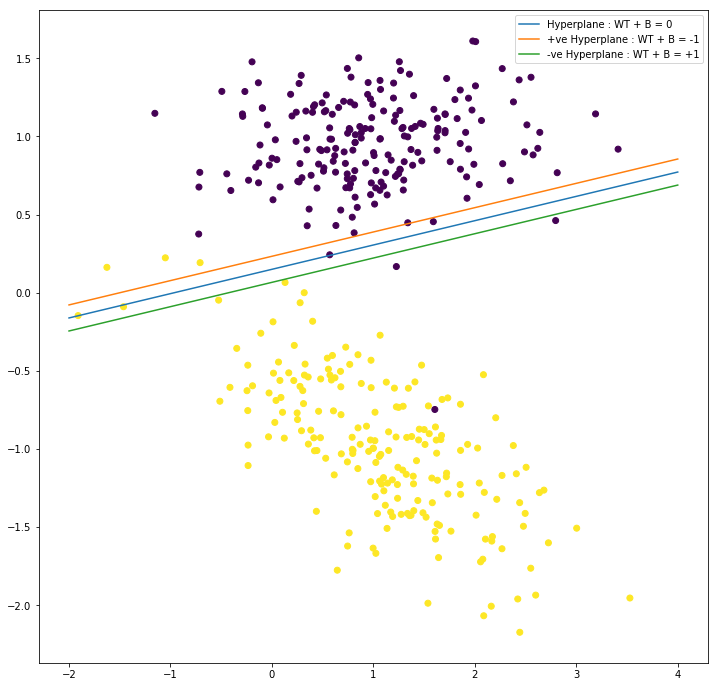

In [14]:
plot_hyperplane(W[0][0],W[0][1],b)

In [15]:
### changing the value of C(penalty constant) changes the maxItr and the width or Er of the SVM...
## lesser vector points come under the margin, ie margin is reduced when C is increased.

# Handling Non-Linear Seperable Data

In [16]:
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

In [17]:
X_data,y_data = make_circles(n_samples=500,noise=0.05)

print(X_data.shape, y_data.shape)

(500, 2) (500,)


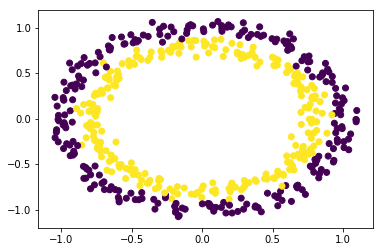

In [18]:
plt.scatter(X_data[:,0],X_data[:,1],c=y_data)

In [19]:
## Projecting data into higher dimensions helps in better classification
## eg: we have two features x1,x2 we introduce a third one x3 that is fuction of x1 & x2 like x1^2+x2^2..etc
## on the basis of x3 we can introduce a new dimension that seperates both datasets by a hyperplane.

In [20]:
## define a func phi..that takes the original features and make a new one by some non-linear trnaformation
def phi(X_data):
    
    X1_data = X_data[:,0]
    X2_data = X_data[:,1]
    X3_data = X1_data**2 + X2_data**2
    
    X_new = np.zeros((X_data.shape[0],3))
    print(X_new.shape)
    
    X_new[:,:-1] = X_data
    X_new[:,-1] = X3_data
    
    return X_new

In [21]:
X_new = phi(X_data)  ## changing the data to higher dim...

(500, 3)


In [22]:
## plotting the 3d plot of the new data
def plot3d(X, show=True):
    
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=y_data,depthshade=True)
    
    if show==True:
        plt.show()
    
    return ax

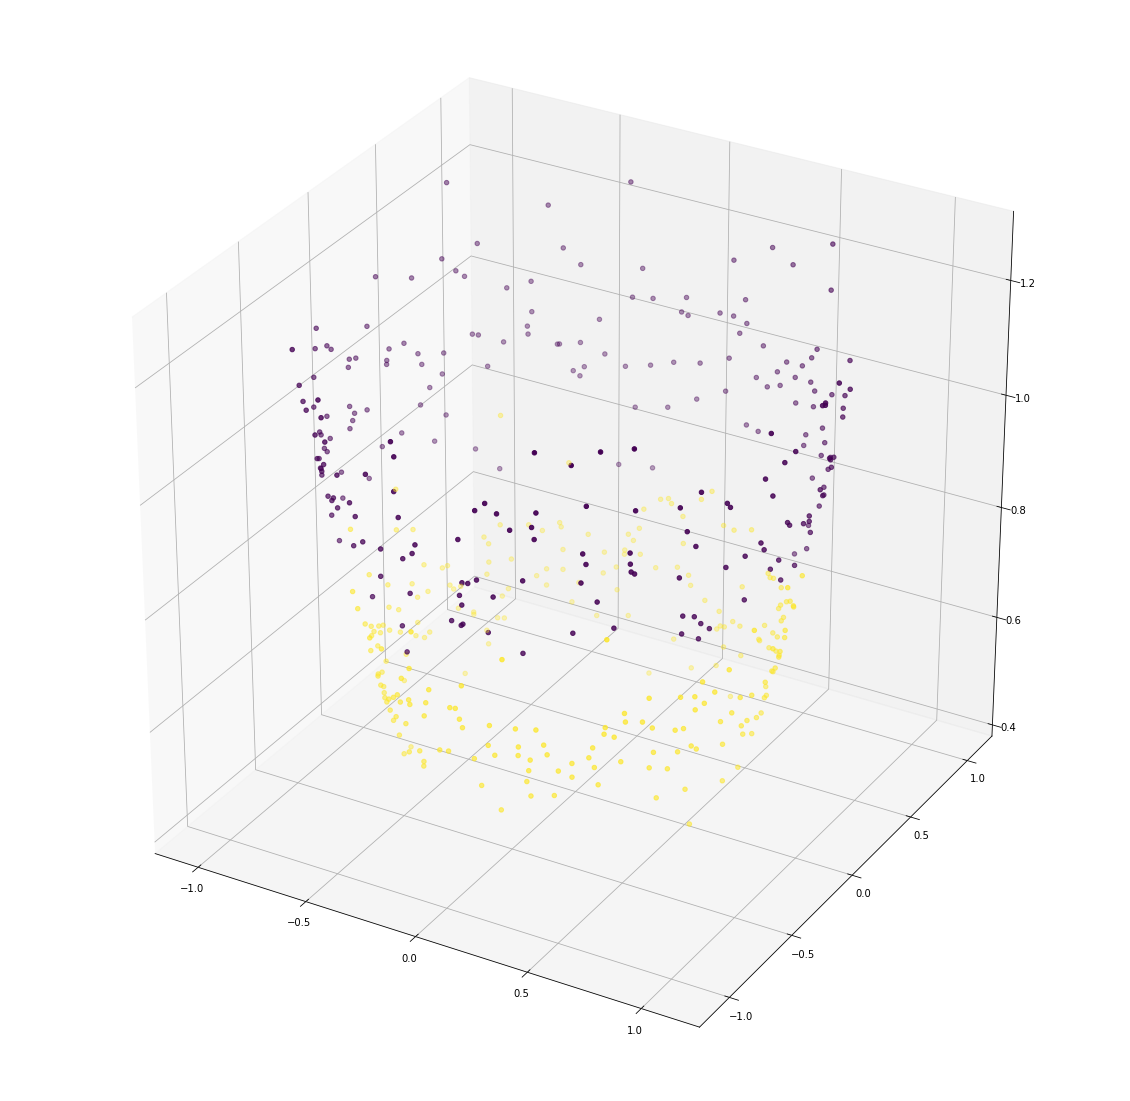

In [23]:
ax = plot3d(X_new)

In [24]:
## Clearly its easier to seperate in this by using a plane that is prerpendicular to z axis here, rather than in 2d

In [25]:
## USING A LOGISTIC CLASSIFIER TO CLASSIFY THIS DATA

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [27]:
Lr = LogisticRegression()

In [28]:
acc = cross_val_score(Lr,X_data,y_data,cv=5).mean()    ## 5-fold cross val
print("accuracy on X_data(2D), %4f" %(acc*100) )

accuracy on X_data(2D), 42.000000


/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

In [29]:
## Clearly 2D gives really bad accuracy 45%

In [30]:
acc = cross_val_score(Lr,X_new,y_data,cv=5).mean()    ## 5-fold cross val
print("accuracy on X_data(3D), %4f" %(acc*100) )

accuracy on X_data(3D), 97.400000


/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

In [31]:
## getting 97% accuracy on 3D dataste

# Visualize The Decision Surface

In [32]:
Lr.fit(X_new,y_data)

/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
wts = Lr.coef_
print(wts)

[[ 0.06737597 -0.01331408 -8.29651498]]


In [34]:
bias = Lr.intercept_

In [35]:
X_, y_ = np.meshgrid(range(-2,2),range(-2,2))
print(X_)
print(y_)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [36]:
z = -(wts[0,0]*X_ + wts[0,1]*y_ + bias)/wts[0,2]
print(z)

[[0.79518714 0.80330813 0.81142913 0.81955012]
 [0.79358236 0.80170335 0.80982435 0.81794534]
 [0.79197758 0.80009857 0.80821957 0.81634056]
 [0.7903728  0.79849379 0.80661479 0.81473578]]


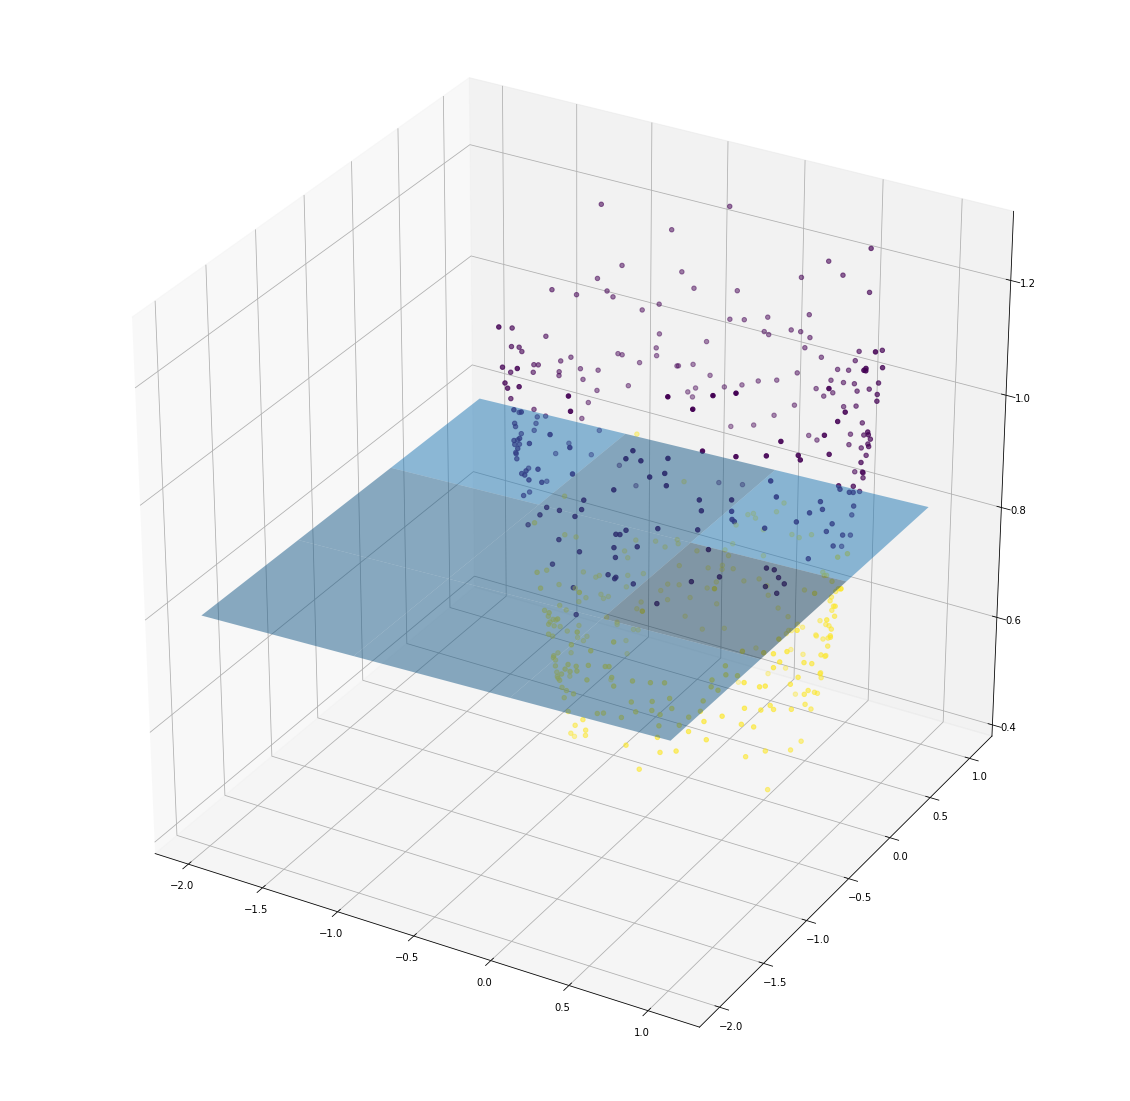

In [37]:
ax = plot3d(X_new, False)
ax.plot_surface(X_,y_,z,alpha=0.5)        ##alpha 4 transparency

plt.show()

# Kernel-based SVM

In [38]:
## classifying on non-linear data requires converting it to higher dimns for better classification using a func-phi
## but doing this on every datapoint is very costly and so we use the kernel trick..
## kernel is a function that allows us to convert the data into higher dimns....but with very little computation..
## using the dot product of the datapoints...<Xi.T, Xj>(dot product of Xi and Xj) and converting it to lower ..
## dimns scalar, but also uincr the dimns of the X..
## types of kernel funcs..Linear, Radial Basis function(RBF), Sigmoid, Polynomial
## for eg..use screenshots

In [39]:
from sklearn import svm

In [40]:
svc = svm.SVC() ##kernel="poly","rbf","sigmoid" 
## Support Vector Classifier,the svm module has:SVC, NuSVC, LinearSVC,by def RBF

In [41]:
svc.fit(X_data,y_data)

/home/vinayak/.local/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [42]:
svc.score(X_data,y_data)

0.974

In [43]:
## 97.4 accuracy

In [44]:
## if kernel was linear in place of non-linear..accuracy reduces to half as in logistic reg...
svc = svm.SVC(kernel="linear")
svc.fit(X_data,y_data)
svc.score(X_data,y_data)

0.49

In [45]:
### CUSTOM KERNEL

In [46]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))         ## matrix multiply using .T

svc = svm.SVC(kernel=custom_kernel)
svc.fit(X_data,y_data)
svc.score(X_data,y_data)

0.978

# MNIST Classification

In [47]:
## using hit-trial in checking for best penalty const val or best kernel can be simply replaced by GridSearch and 
## specify the parameteres you wanna test on..we give all the options of kernels and C..and it returns best

In [48]:
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [49]:
import multiprocessing
cpus = multiprocessing.cpu_count()
print(cpus)                                   ## i have 8 cpus we found this for faster iter in gs

8


In [50]:
## create a list of dict for all the options u have for both kernel and c::
params = [
    {
        'kernel':['linear','rbf','poly','sigmoid'],
        'C':[0.1,0.2,0.5,1.0,2.0,5.0]
    }
]

In [51]:
## Data Perp
data = load_digits()
X_data = data.data
y_data = data.target

print(X_data.shape,y_data.shape)

(1797, 64) (1797,)


In [52]:
## Logistic acc 
lr = LogisticRegression()
lr.fit(X_data,y_data)
cross_val_score(lr,X_data,y_data,scoring='accuracy',cv=5).mean()

/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:

0.9210188113360701

In [53]:
## using SVM

svc = svm.SVC()
svc.fit(X_data,y_data)

cross_val_score(svc,X_data,y_data,scoring='accuracy',cv=5).mean()

/home/vinayak/.local/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/vinayak/.local/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/vinayak/.local/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/vinayak/.local/lib/python3.5/site-packages/sklearn/svm/

0.44878680061604637

In [54]:
## clearly right hyper-parameters are not used

In [55]:
## using gridsearch

gs = GridSearchCV(estimator=svm.SVC(),param_grid=params,scoring='accuracy',cv=5,n_jobs=cpus)
gs.fit(X_data,y_data)

/home/vinayak/.local/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/vinayak/.local/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=8,
             param_grid=[{'C': [0.1, 0.2, 0.5, 1.0, 2.0, 5.0],
                          'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [56]:
gs.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [57]:
## this is the best hyperparameter configuration

In [58]:
gs.best_score_

0.9699499165275459